# Produces graphs like CMD, L functions etc.

In [1]:
%matplotlib inline
import numpy as np
from astropy import stats
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Catalogue Operations

In [2]:
# Read in the background files
file = 'second_data.csv'
data = ascii.read(file, data_start=1)
print(np.min(data['mag_36_1']))
print(np.min(data['mag_36_3']))
print(np.min(data['mag_36_4']))
print(np.min(data['mag_45_1']))
print(np.min(data['mag_45_3']))
print(np.min(data['mag_45_4']))

14.64750491
14.54650491
14.96250491
14.13455224
14.10555224
14.85455224


In [3]:
good_E1_idx = np.where((data['mag_36_1']!=9999) & (data['mag_45_1']!=9999))
good_E3_idx = np.where((data['mag_36_3']!=9999) & (data['mag_45_3']!=9999))
good_E4_idx = np.where((data['mag_36_4']!=9999) & (data['mag_45_4']!=9999))
print(len(good_E1_idx[0]))
print(len(good_E3_idx[0]))
print(len(good_E4_idx[0]))

# Use colour cutoffs on CMD of -1.6 to 1.5
bright_blue_1_idx = np.where((data['mag_36_1']-data['mag_45_1'] < -1.6) &(data['mag_36_1']!=9999)&(data['mag_45_1']!=9999))
faint_red_1_idx = np.where((data['mag_36_1']-data['mag_45_1'] > 1.5) & (data['mag_36_1']!=9999)&(data['mag_45_1']!=9999))
bright_blue_3_idx = np.where((data['mag_36_3']-data['mag_45_3'] < -1.6) & (data['mag_36_3']!=9999)&(data['mag_45_3']!=9999))
faint_red_3_idx = np.where((data['mag_36_3']-data['mag_45_3'] > 1.5) & (data['mag_36_3']!=9999)&(data['mag_45_3']!=9999))
bright_blue_4_idx = np.where((data['mag_36_4']-data['mag_45_4'] < -1.6) & (data['mag_36_4']!=9999)&(data['mag_45_4']!=9999))
faint_red_4_idx = np.where((data['mag_36_4']-data['mag_45_4'] > 1.5) & (data['mag_36_4']!=9999)&(data['mag_45_4']!=9999))
print("bright blue 1:",len(bright_blue_1_idx[0]))
print("faint red 1:",len(faint_red_1_idx[0]))
print("bright blue 3:",len(bright_blue_3_idx[0]))
print("faint red 3:",len(faint_red_3_idx[0]))
print("bright blue 4:",len(bright_blue_4_idx[0]))
print("faint red 4:",len(faint_red_4_idx[0]))

1387
903
933
bright blue 1: 37
faint red 1: 18
bright blue 3: 17
faint red 3: 5
bright blue 4: 26
faint red 4: 3


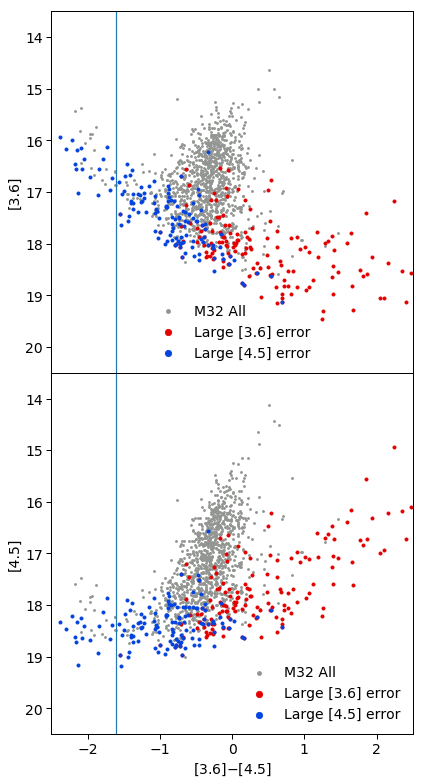

In [9]:
# See where bad mag error points lie on a CMD
# Use two different cutoffs to be overplotted on the same graph
bad_mag_error_idx_36_1a = np.where((100*data['mag_err_36_1']/data['mag_36_1'])>1)
bad_mag_error_idx_36_1b = np.where((100*data['mag_err_36_1']/data['mag_36_1'])>1.1)
bad_mag_error_idx_45_1a = np.where((100*data['mag_err_45_1']/data['mag_45_1'])>1.4)
bad_mag_error_idx_45_1b = np.where((100*data['mag_err_45_1']/data['mag_45_1'])>1.5)

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))
# Plot all sensible stars
plt.subplot(2,1,1)
plt.scatter(data['mag_36_1'][good_E1_idx]-data['mag_45_1'][good_E1_idx], data['mag_36_1'][good_E1_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All")
# Overplot variable sources
plt.scatter(data['mag_36_1'][bad_mag_error_idx_36_1a]-data['mag_45_1'][bad_mag_error_idx_36_1a], data['mag_36_1'][bad_mag_error_idx_36_1a],s=10,color=sns.xkcd_rgb['red'],label="Large [3.6] error")
plt.scatter(data['mag_36_1'][bad_mag_error_idx_45_1a]-data['mag_45_1'][bad_mag_error_idx_45_1a], data['mag_36_1'][bad_mag_error_idx_45_1a],s=10,color=sns.xkcd_rgb['blue'],label="Large [4.5] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
plt.axvline(x=-1.6)
plt.legend(loc="lower center",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E1', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.subplot(2,1,2)
plt.scatter(data['mag_36_1'][good_E1_idx]-data['mag_45_1'][good_E1_idx], data['mag_45_1'][good_E1_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All")
# Overplot variable sources
plt.scatter(data['mag_36_1'][bad_mag_error_idx_36_1a]-data['mag_45_1'][bad_mag_error_idx_36_1a], data['mag_45_1'][bad_mag_error_idx_36_1a],s=10,color=sns.xkcd_rgb['red'],label="Large [3.6] error")
plt.scatter(data['mag_36_1'][bad_mag_error_idx_45_1a]-data['mag_45_1'][bad_mag_error_idx_45_1a], data['mag_45_1'][bad_mag_error_idx_45_1a],s=10,color=sns.xkcd_rgb['blue'],label="Large [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
plt.axvline(x=-1.6)
plt.legend(loc="lower right",frameon=False, scatterpoints=1, numpoints=1, markerscale=2.)
#plt.title('M32 E1', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

1387
230


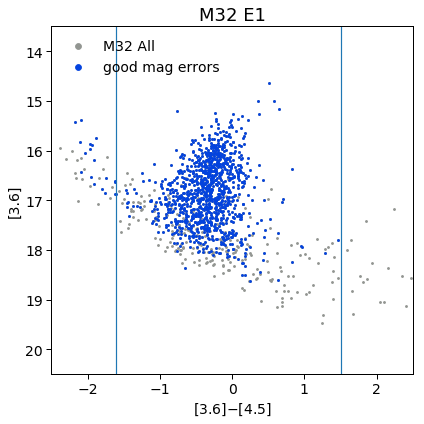

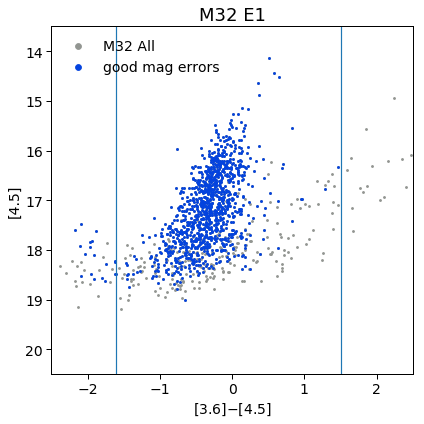

In [52]:
# Subtract blue and red points above from the CMDs to see what the clean graphs look like

# Here are sources in E1 with good 36 AND good 45 mag errors
good_mag_error_idx_1a = np.where(((100*data['mag_err_36_1']/data['mag_36_1'])<=1) &
                                   ((100*data['mag_err_45_1']/data['mag_45_1'])<=1.4))
print(len(data))
print(len(bad_mag_error_idx_1a[0]))

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(data['mag_36_1'][good_E1_idx]-data['mag_45_1'][good_E1_idx], data['mag_36_1'][good_E1_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All")
# Overplot variable sources
plt.scatter(data['mag_36_1'][good_mag_error_idx_1a]-data['mag_45_1'][good_mag_error_idx_1a], data['mag_36_1'][good_mag_error_idx_1a],s=3.9,color=sns.xkcd_rgb['blue'],label="good mag errors")
#plt.scatter(data['mag_36_1'][bad_mag_error_idx_45_1a]-data['mag_45_1'][bad_mag_error_idx_45_1a], data['mag_36_1'][bad_mag_error_idx_45_1a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
plt.axvline(x=1.5)
plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
plt.title('M32 E1', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.show()
plt.close()


# Repeat for 4.5
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(data['mag_36_1'][good_E1_idx]-data['mag_45_1'][good_E1_idx], data['mag_45_1'][good_E1_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All")
# Overplot variable sources
plt.scatter(data['mag_36_1'][good_mag_error_idx_1a]-data['mag_45_1'][good_mag_error_idx_1a], data['mag_45_1'][good_mag_error_idx_1a],s=3.9,color=sns.xkcd_rgb['blue'],label="good mag errors")
#plt.scatter(data['mag_36_1'][bad_mag_error_idx_45_1a]-data['mag_45_1'][bad_mag_error_idx_45_1a], data['mag_45_1'][bad_mag_error_idx_45_1a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
plt.axvline(x=1.5)
plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
plt.title('M32 E1', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.show()
plt.close()

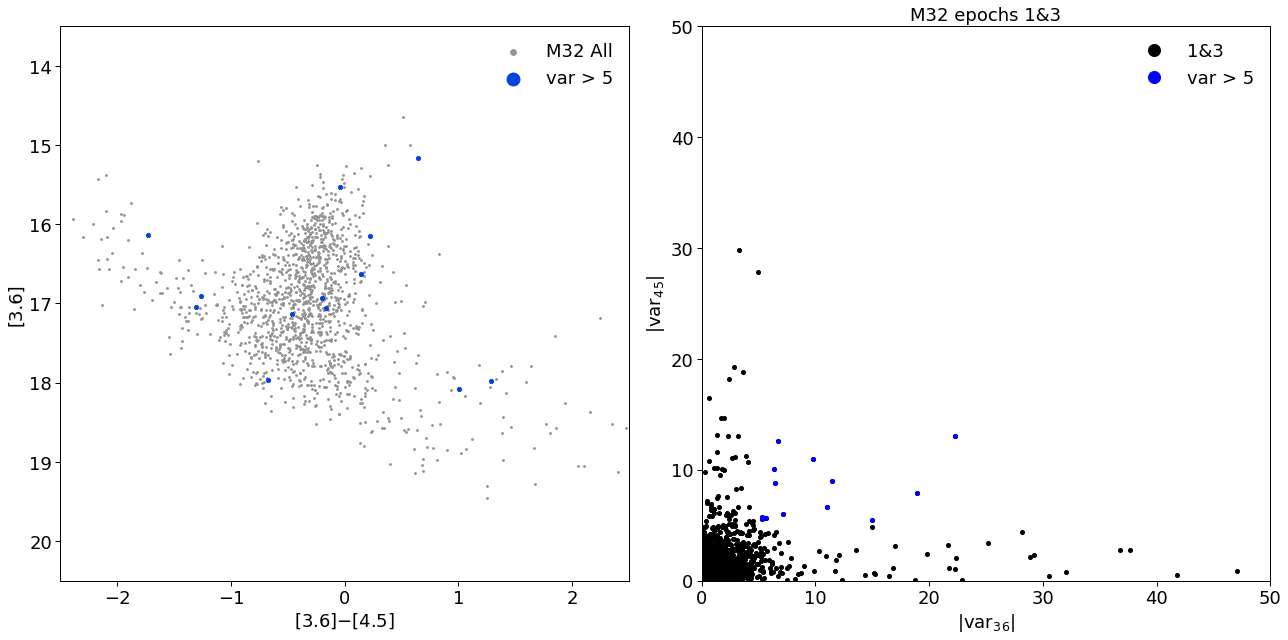

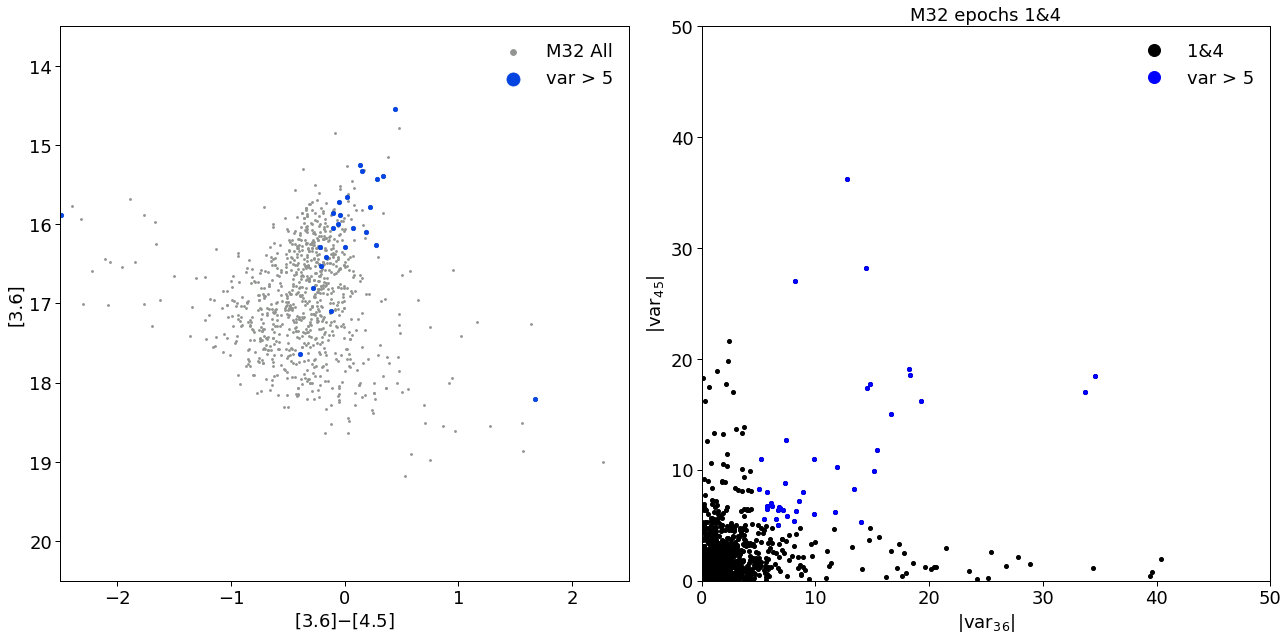

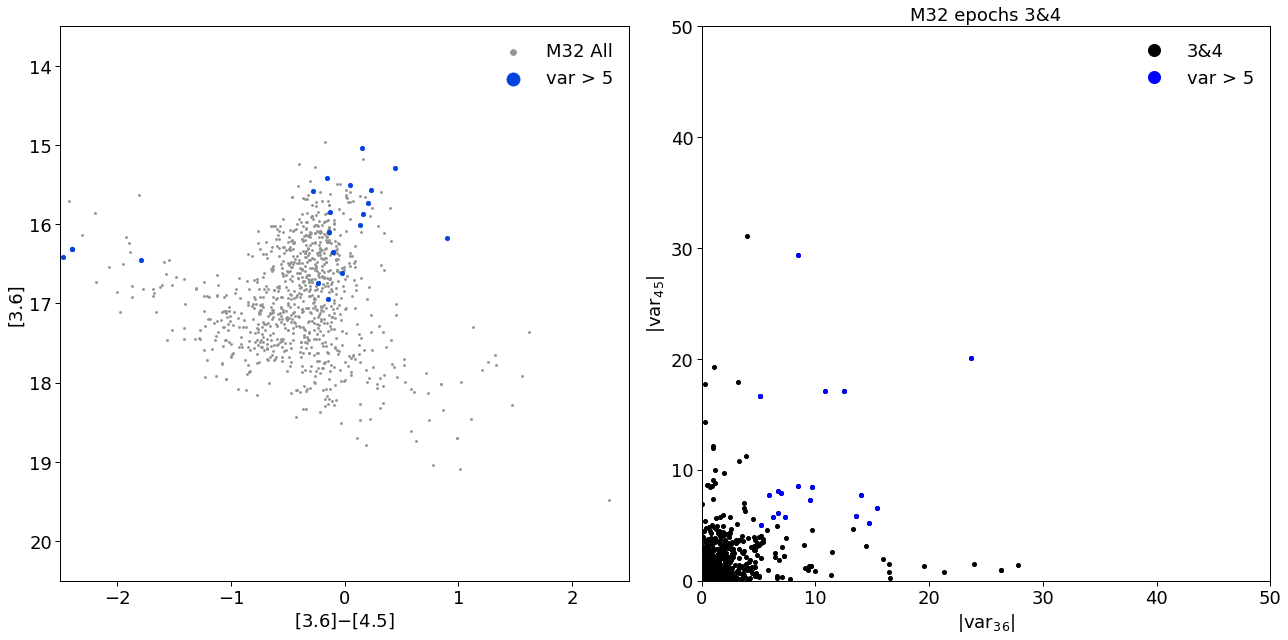

In [16]:
# Function to plot CMD without lines
def CMD(table,A,B,C,D,index,var_idx_3,var_idx_4,var_idx_5,xlabel,ylabel,xlim,ylim,epoch):
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()
    # Setting up figure
    #ax = plt.gca()
    plt.figure(figsize=(18,9))
    
    plt.subplot(1,2,1)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][index]-table[B][index], table[A][index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All")
    # Overplot variable sources
    #plt.scatter(table[A][var_idx_3]-table[B][var_idx_3], table[A][var_idx_3],s=19,color=sns.xkcd_rgb['red'],label="var > 3")
    #plt.scatter(table[A][var_idx_4]-table[B][var_idx_4], table[A][var_idx_4],s=19,color=sns.xkcd_rgb['green'],label="var > 4")
    plt.scatter(table[A][var_idx_5]-table[B][var_idx_5], table[A][var_idx_5],s=19,color=sns.xkcd_rgb['blue'],label="var > 5")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Add a legend
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    # Make the actual plot
    plt.subplot(1,2,2)
    plt.plot(data[C], data[D], 'o', color='black', ms=4, label=epoch)
    # Overplot variable sources
    #plt.plot(data[C][var_idx_3], data[D][var_idx_3], 'o', color='red', ms=4,label="var > 3")
    #plt.plot(data[C][var_idx_4], data[D][var_idx_4], 'o', color='green', ms=4,label="var > 4")
    plt.plot(data[C][var_idx_5], data[D][var_idx_5], 'o', color='blue', ms=4,label="var > 5")
    plt.xlabel('|var$_3$$_6$|', size=18)
    plt.ylabel('|var$_4$$_5$|', size=18)
    plt.xlim(0,50)
    plt.ylim(0,50)
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    plt.title('M32 epochs '+epoch, fontsize=18)
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
 
    
#CMD(data,'mag_36_1','mag_45_1',good_E1_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1')
#CMD(data,'mag_36_1','mag_45_1',great_E1_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1great')
#CMD(data,'mag_36_3','mag_45_3',good_E3_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'3')
#CMD(data,'mag_36_3','mag_45_3',great_E3_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'3great')
#CMD(data,'mag_36_4','mag_45_4',good_E4_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'4')
#CMD(data,'mag_36_4','mag_45_4',great_E4_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'4great')
#bgd_data = ascii.read('background/background_good_mean_fits.csv')
#good_bgd_idx = np.where(bgd_data['ID']!=0)
#CMD(bgd_data,'S1_0_MAG1_0','S2_0_MAG2_0',good_bgd_idx,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),' bgd')

good_var_1_3_idx_3 = np.where((data['var_36_1_3']!=9999)&(data['var_36_1_3']>3)&
                              (data['var_45_1_3']!=9999)&(data['var_45_1_3']>3))
good_var_1_3_idx_4 = np.where((data['var_36_1_3']!=9999)&(data['var_36_1_3']>4)&
                              (data['var_45_1_3']!=9999)&(data['var_45_1_3']>4))
good_var_1_3_idx_5 = np.where((data['var_36_1_3']!=9999)&(data['var_36_1_3']>5)&
                              (data['var_45_1_3']!=9999)&(data['var_45_1_3']>5))

good_var_1_4_idx_3 = np.where((data['var_36_1_4']!=9999)&(data['var_36_1_4']>3)&
                              (data['var_45_1_4']!=9999)&(data['var_45_1_4']>3))
good_var_1_4_idx_4 = np.where((data['var_36_1_4']!=9999)&(data['var_36_1_4']>4)&
                              (data['var_45_1_4']!=9999)&(data['var_45_1_4']>4))
good_var_1_4_idx_5 = np.where((data['var_36_1_4']!=9999)&(data['var_36_1_4']>5)&
                              (data['var_45_1_4']!=9999)&(data['var_45_1_4']>5))

good_var_3_4_idx_3 = np.where((data['var_36_3_4']!=9999)&(data['var_36_3_4']>3)&
                              (data['var_45_3_4']!=9999)&(data['var_45_3_4']>3))
good_var_3_4_idx_4 = np.where((data['var_36_3_4']!=9999)&(data['var_36_3_4']>4)&
                              (data['var_45_3_4']!=9999)&(data['var_45_3_4']>4))
good_var_3_4_idx_5 = np.where((data['var_36_3_4']!=9999)&(data['var_36_3_4']>5)&
                              (data['var_45_3_4']!=9999)&(data['var_45_3_4']>5))
#good_var_1_4_idx = np.where((data['var_36_1_4']!=9999) & (data['var_45_1_4']!=9999))
#good_var_3_4_idx = np.where((data['var_36_3_4']!=9999) & (data['var_45_3_4']!=9999))
CMD(data,'mag_36_1','mag_45_1','var_36_1_3','var_45_1_3',good_E1_idx,good_var_1_3_idx_3,good_var_1_3_idx_4,
    good_var_1_3_idx_5,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&3')
CMD(data,'mag_36_3','mag_45_3','var_36_1_4','var_45_1_4',good_E3_idx,good_var_1_4_idx_3,good_var_1_4_idx_4,
    good_var_1_4_idx_5,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&4')
CMD(data,'mag_36_4','mag_45_4','var_36_3_4','var_45_3_4',good_E4_idx,good_var_3_4_idx_3,good_var_3_4_idx_4,
    good_var_3_4_idx_5,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'3&4')

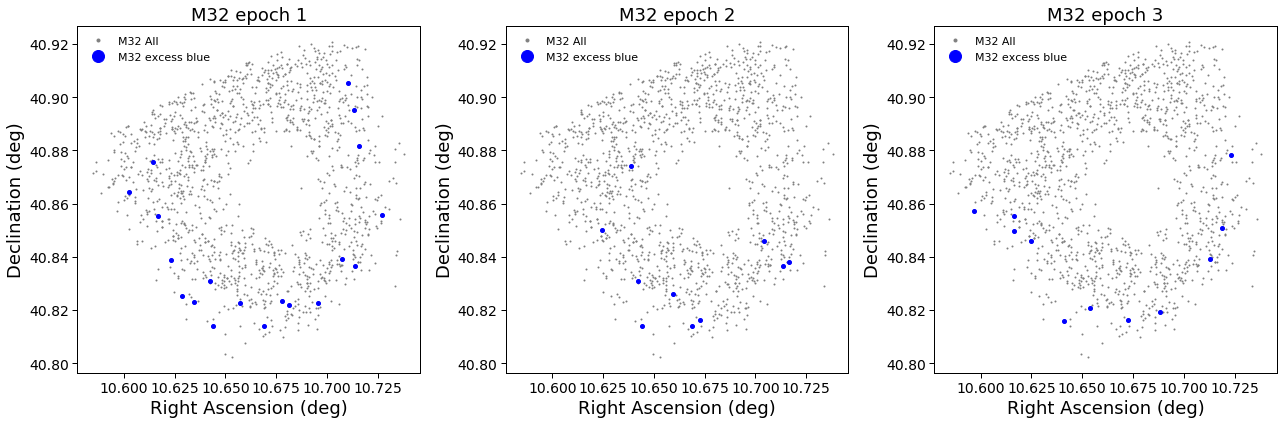

In [13]:
# Plot sources with a high or low colour that aren't bad mag error too.
# These graphs apply to both [3.6] and [4.5].
blue_1_idx = np.where((data['mag_36_1']-data['mag_45_1'] < -1.6) &(data['mag_36_1']!=-99)&(data['mag_45_1']!=-99)&
                     ((100*data['mag_err_36_1']/data['mag_36_1'])<=1) &
                      ((100*data['mag_err_45_1']/data['mag_45_1'])<=1.4))
blue_3_idx = np.where((data['mag_36_3']-data['mag_45_3'] < -1.6) &(data['mag_36_3']!=-99)&(data['mag_45_3']!=-99)&
                     ((100*data['mag_err_36_3']/data['mag_36_3'])<=1) &
                      ((100*data['mag_err_45_3']/data['mag_45_3'])<=1.4))
blue_4_idx = np.where((data['mag_36_4']-data['mag_45_4'] < -1.6) &(data['mag_36_4']!=-99)&(data['mag_45_4']!=-99)&
                     ((100*data['mag_err_36_4']/data['mag_36_4'])<=1) &
                      ((100*data['mag_err_45_4']/data['mag_45_4'])<=1.4))

# Define function to produce location plot
def loc_plot_simple(idx1,idx3,idx4,description,colour):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(18,6))
    ax = plt.gca()                        # Sets up active plot region
    
    # Make the actual plot
    plt.subplot(1,3,1)
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=2, label="M32 All")
    plt.plot(data['RA'][idx1], data['Dec'][idx1], 'o', color=colour, ms=4, label="M32 "+description)    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epoch 1',fontsize=18)
    
    plt.subplot(1,3,2)
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=2, label="M32 All")
    plt.plot(data['RA'][idx3], data['Dec'][idx3], 'o', color=colour, ms=4, label="M32 "+description)    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epoch 2',fontsize=18)
    
    plt.subplot(1,3,3)
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=2, label="M32 All")
    plt.plot(data['RA'][idx4], data['Dec'][idx4], 'o', color=colour, ms=4, label="M32 "+description)    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epoch 3',fontsize=18)
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()
    
loc_plot_simple(blue_1_idx,blue_3_idx,blue_4_idx,'excess blue','blue')
#loc_plot_simple(faint_red_1_idx,faint_red_3_idx,faint_red_4_idx,'excess red','red')

In [67]:
print(data.colnames)

['ID', 'RA', 'Dec', 'total_associations', 'ID_36_1', 'RA_36_1', 'Dec_36_1', 'mag_36_1', 'mag_err_36_1', 'ID_36_3', 'RA_36_3', 'Dec_36_3', 'mag_36_3', 'mag_err_36_3', 'sep_36_1_3', 'p_any_36_1_3', 'p_i_36_1_3', 'ID_36_4', 'RA_36_4', 'Dec_36_4', 'mag_36_4', 'mag_err_36_4', 'sep_36_1&3_4', 'p_any_36_1&3_4', 'p_i_36_1&3_4', '36_associations', 'ID_45_1', 'RA_45_1', 'Dec_45_1', 'mag_45_1', 'mag_err_45_1', 'ID_45_3', 'RA_45_3', 'Dec_45_3', 'mag_45_3', 'mag_err_45_3', 'sep_45_1_3', 'p_any_45_1_3', 'p_i_45_1_3', 'ID_45_4', 'RA_45_4', 'Dec_45_4', 'mag_45_4', 'mag_err_45_4', 'sep_45_1&3_4', 'p_any_45_1&3_4', 'p_i_45_1&3_4', '45_associations', 'sep_mean_36_mean_45', 'p_any_36_45', 'p_i_36_45']


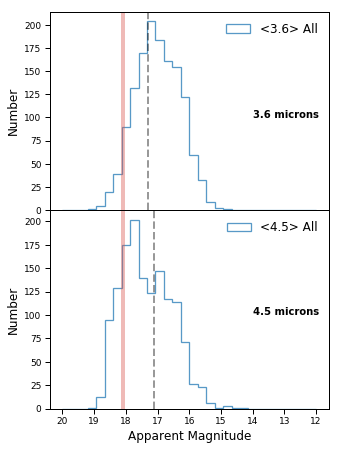

In [17]:
def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values

    # For single column figures:
    width = 3.8
    height = width / 1.7

set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5, 10/1.37))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)


############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(data['mean_mag_36'])  # Determinal optimal bin size
bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="<3.6> All", ls="solid")

#n, edg, patches = ax1.hist(colddata['[3.6]'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1.75, histtype='step', label="E0 [3.6]", ls="solid")

#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number", fontsize=12)

#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax1.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4)

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [14, 100], horizontalalignment='left', size='medium', color='black',weight='bold')


n, edg, patches = ax2.hist(data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="<4.5> All", ls="solid")

#n, edg, patches = ax2.hist(colddata['[4.5]'], bins,  # facecolor='g', edgecolor='b',
#                         lw=1.3, alpha=1.75, histtype='step', label="E0 [4.5]", ls="solid")

ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number", fontsize=12)

#Add 80% Completness limit
ax2.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax2.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4)

#Set legend
ax2.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [14, 100], horizontalalignment='left', size='medium', color='black',weight='bold')


plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


In [18]:
print(np.max(data['mean_mag_36']-data['mean_mag_45']))
print(np.min(data['mean_mag_36']-data['mean_mag_45']))

1.733452670000002
-2.36854733


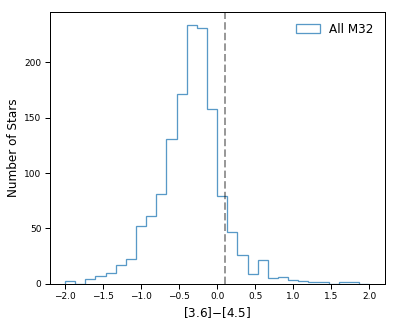

In [19]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(6, 5))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(data['mean_mag_36']-data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-2, 2, 31)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(data['mean_mag_36']-data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="All M32", ls="solid")

#n, edg, patches = ax1.hist(colddata['[3.6]'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1.75, histtype='step', label="E0 [3.6]", ls="solid")

ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of Stars", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


# NB cell below has data replaced with prob_data

1337


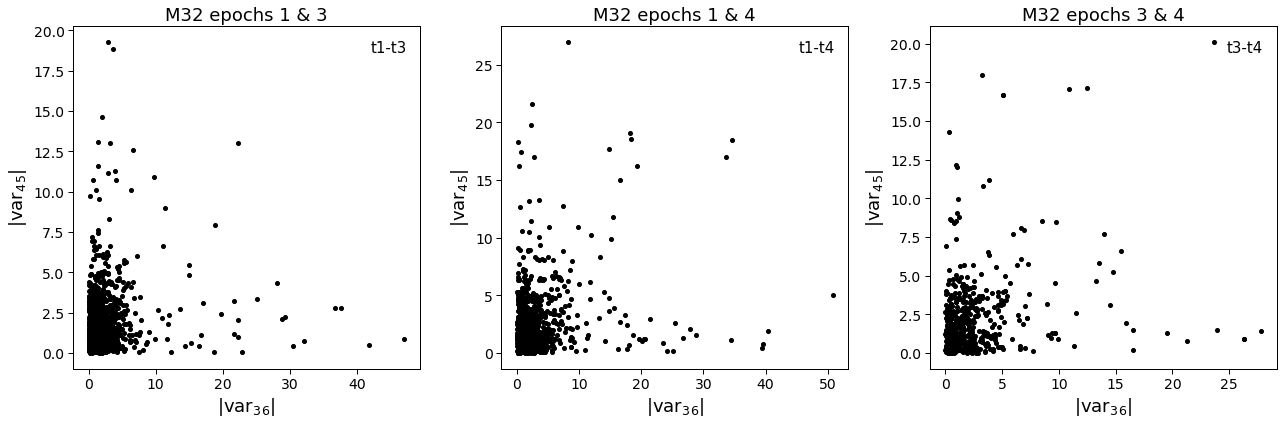

In [25]:
prob_idx = np.where(data['p_i_36_45']==1)
print(len(prob_idx[0]))
prob_data = data[prob_idx]

good_var_1_3_idx = np.where((prob_data['var_36_1_3']!=9999) & (prob_data['var_45_1_3']!=9999))
good_var_1_4_idx = np.where((prob_data['var_36_1_4']!=9999) & (prob_data['var_45_1_4']!=9999))
good_var_3_4_idx = np.where((prob_data['var_36_3_4']!=9999) & (prob_data['var_45_3_4']!=9999))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(18,6))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,3,1)
plt.plot(prob_data['var_36_1_3'][good_var_1_3_idx], prob_data['var_45_1_3'][good_var_1_3_idx], 'o', color='black', ms=4, label="t1-t3")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
plt.title('M32 epochs 1 & 3',fontsize=18)

plt.subplot(1,3,2)
plt.plot(prob_data['var_36_1_4'][good_var_1_4_idx], prob_data['var_45_1_4'][good_var_1_4_idx], 'o', color='black', ms=4, label="t1-t4")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
plt.title('M32 epochs 1 & 4',fontsize=18)

plt.subplot(1,3,3)
plt.plot(prob_data['var_36_3_4'][good_var_3_4_idx], prob_data['var_45_3_4'][good_var_3_4_idx], 'o', color='black', ms=4, label="t3-t4")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
plt.title('M32 epochs 3 & 4',fontsize=18)

#bbb = sns.jointplot(prob_data['var_36_1_3'][good_var_1_3_idx], prob_data['var_45_1_3'][good_var_1_3_idx], kind="scatter")

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

Text(0.5, 1.0, 'M32 epochs 1 & 3')

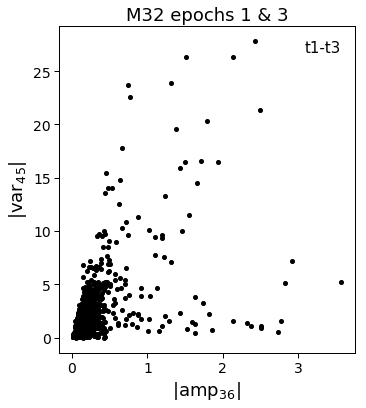

In [5]:
good_amp_var_36_idx = np.where((data['amp_36']!=9999) & (data['var_36_3_4']!=9999))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(18,6))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,3,1)
plt.plot(data['amp_36'][good_amp_var_36_idx], data['var_36_3_4'][good_amp_var_36_idx], 'o', color='black', ms=4, label="t1-t3")
plt.xlabel('|amp$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
plt.title('M32 epochs 1 & 3',fontsize=18)

In [10]:
idx_good_var_36_1_3 = np.where(data['var_36_1_3']!=9999)
def graph(index,col):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=15)
    plt.figure(figsize=(6,6))
    ax = plt.gca()                        # Sets up active plot region

    # Make the actual plot
    #plt.subplot(1,3,1)
    plt.plot(data['var_36_1_3'][index], data[col][index], 'o', color='black', ms=4)
    plt.xlabel('var_36_1_3', size=18)
    plt.ylabel(col, size=18)
    #plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
    plt.title('M32'+col,fontsize=18)
    
'''print(len(data.colnames))
for i in range(len(data.colnames)):
    col_name = data.colnames[i]
    idx_good = np.where((data[col_name]!=9999) & (data['var_36_1_3']!=9999))
    graph(idx_good,col_name)'''

"print(len(data.colnames))\nfor i in range(len(data.colnames)):\n    col_name = data.colnames[i]\n    idx_good = np.where((data[col_name]!=9999) & (data['var_36_1_3']!=9999))\n    graph(idx_good,col_name)"

In [34]:
# Define function to produce location plot
def loc_plot(file,filtr,epoch):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(9,9))
    ax = plt.gca()                        # Sets up active plot region
    
    # Make the actual plot
    data = ascii.read(file, data_start=1)
    plt.plot(data_36['RA'], data['DEC'], '.', color='black', ms=0.2, label="M32 All")    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(filtr+'-'+epoch,fontsize=18)
    
    # Plot a box
    #x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    #x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    #x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    #x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    #plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()

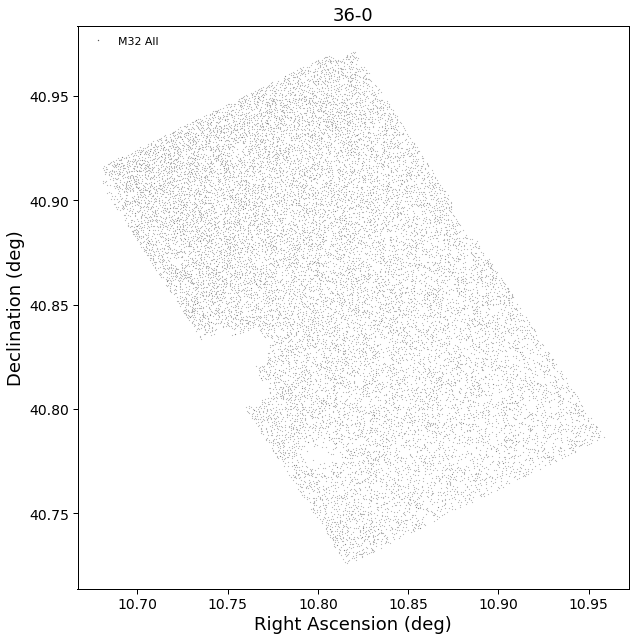

In [35]:
# Show location plot of background 36 field
loc_plot('MAG_S1_0.csv','36','0')